#Seminar Neurale Netwerken Week 1

Deze week leer je over:

*   Het verschil tussen regressie en classificatie
*   De verschillende activatie functies
*   Normalisatie
*   Class imbalance
*   Accuracy, MAE etc.
*   Het voorbereiden van data

De slides kun je [hier](https://docs.google.com/presentation/d/1NglNkuK9wKJwEkUGjwfPz6jtvpmeCF1PhfnVcJKthCA/edit?usp=sharing) vinden.


# Regressie/Classificatie

Vorige week ben je bezig geweest met regressie, je hebt steeds continue variabelen voorspeld.
Nu gaan we kijken naar Classificatie, Hier voorspel je discrete klasse zoals 'hond' of 'kat'. Het grootste verschil ten opzichte van vorige week is dat 'kat' niet groter (of kleiner) is dan 'hond' (maar \$600000 is wel groter dan \$30000)

## Is de lengte van een persoon continue of discreet? Onderbouw je antwoord.


## Is de kleur van een stoplicht continue of discreet? Onderbouw je antwoord.


## Is de achternaam van een persoon continue of discreet? Onderbouw je antwoord.


## Is het aantal slaapkamers in een huis continue of discreet? Onderbouw je antwoord.



---




Een neuraal netwerk kan worden ingesteld om op één van deze twee typen data te werken. Vaak is het wel mogelijk om continue data discreet te maken en andersom, omdat je de data vaak op andere manieren kan representeren. Zo kun je bijvoorbeeld de leeftijd van een persoon uitdrukken in jaren, dagen of seconden, maar je kunt het ook uitdrukken een een leeftijdsgroep (0-9,10-19,20-29,...). Je zou kunnen zeggen dat jaren, dagen of seconden ook al discreet is, en alleen maar continue zou zijn als het uitgedrukt is in een kommagetal.

Deze keer maken we zelf een dataset bestaande uit twee klassen: 'blauw' en 'oranje', met twee input waardes 'x' en 'y'.
We maken een aantal datapunten aan volgens de volgende methode

* kies $x$ en $y$ willekeurig tussen -1 en 1
* als $x*y > 0$ dan is de klasse gelijk aan 1 (blauw), anders is het gelijk aan 0 (oranje)

We moeten de klasse aangeven door middel van class labels (in dit geval **0** en **1**) zodat sklearn de data kan gebruiken.


In [ ]:
import random
import pandas as pd

np_data = []

for i in range(1000):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    if x*y > 0:
        klasse  = 1
    else:
        klasse  = 0

    np_data.append([x,y,klasse])

dataset = pd.DataFrame(np_data)
dataset.head(10)
    

## Is de data in kolom 0 continue of discreet? Onderbouw je antwoord.

## Is de data in kolom 2 continue of discreet? Onderbouw je antwoord.


Split de dataset m.b.v. [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
from sklearn.model_selection import train_test_split

input_data = dataset[[0,1]] # selecteer kolom 0 en kolom 1 als de input data
labels = dataset[[2]] # selecteer kolom 2 als de label data

#Jouw code hier
# input_data_train, input_data_test, labels_train, labels_test = ...


Om een netwerk te maken voor regression, gebruikten we vorige week


```
hidden_layer_sizes = [20,20,5]
network = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes)
network.fit(input_data_train, labels_train)
```

Deze keer gebruiken we [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier). 

Belangrijk: Geef het netwerk twee hidden layers met ieder maar twee neuronen.



In [ ]:
from sklearn.neural_network import MLPClassifier

#Jouw code hier:
#...



#### Nu kunnen we niet de MAE gebruiken, waarom niet?

In plaats daarvan gebruiken we accuracy: hoe veel procent van de tijd voorspellen we de klasse juist.


Bijvoorbeeld:
``` 
we voorspellen : [oranje,oranje,oranje,blauw,oranje]
de labels zijn: [blauw,oranje,oranje,blauw,oranje]
we hebben 4 van de 5 labels goed voorspelt, onze accuracy is dus 4/5 = 80%
```


Schrijf nu zelf code om accuracy te berekenen.

Vorige week gebruiktte we deze code voor MAE, Je kunt dit als inspiratie gebruiken.



In [ ]:
def bereken_MAE(pred_labels,true_labels):
    all_errors = []
    for pred_label,true_label in zip(pred_labels,true_labels):
        #in elke iteratie van de loop krijgen we 1 predicted label in pred_label en 1 bijbehorend true label in true_label
        absolute_error = abs(pred_label-true_label)
        all_errors.append(absolute_error)
        
    MAE = sum(all_errors)/len(all_errors) 
    return MAE

In [ ]:
# hint: de input voor de bereken accuracy functie heeft de volgende vorm:
# pred_labels = [0,0,1,0,1,1,1,1]
# true_labels = [1,0,1,1,0,0,1,1]

def bereken_accuracy(pred_labels,true_labels):
    #typ je code hier
    #...



Hieronder testen we of jouw functie correct werkt. Krijg je een foutmelding? Dan klopt de bereken_accuracy functie hierboven nog niet helemaal.

In [ ]:
l1 = [1,2,3,4,5,6,7,8]
l2 = [1,2,3,4,4,4,4,4]
l3 = [1,2,9,9,9,9,9,9]
l4 = [9,9,9,9,9,9,9,9]

assert bereken_accuracy(l1,l2) == 0.5
assert bereken_accuracy(l1,l3) == 0.25
assert bereken_accuracy(l1,l4) == 0.0
assert bereken_accuracy(l3,l4) == 0.75

In [ ]:

pred_labels = network.predict(input_data_test)
true_labels = labels_test[[2]].values.flatten()

acc = bereken_accuracy(pred_labels,true_labels)
print('Accuracy: {}'.format(acc))

Kijk naar [deze](https://playground.tensorflow.org/#activation=relu&batchSize=3&dataset=xor&regDataset=reg-gauss&learningRate=0.1&regularizationRate=0&noise=0&networkShape=2,2&seed=0.66813&showTestData=false&discretize=true&percTrainData=20&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&showTestData_hide=false&batchSize_hide=true&dataset_hide=true&regularization_hide=true&learningRate_hide=false&regularizationRate_hide=true&noise_hide=true&discretize_hide=true&percTrainData_hide=false&problem_hide=true) site.

Hier kun je dezelfde dataset zien als die we net gemaakt hebben. Linksboven staat een knop waarmee je dat netwerk kan laten trainen. Ook zijn er knoppen waarmee je meer neuronen en lagen kan toevoegen.

Tijdens het trainen, zie je rechts welk gebied welke predictie heeft. De bolletjes geeft aan welke voorbeelden in de dataset zitten

 Experimenteer met verschillende aantallen hidden layers en neuronen en beantwoord de volgende vragen. 
 
 (Verander niet welke features ($x_{12}$ $x_{22}$ $sin(x_1)$ etc.) je gebruikt.)





## Wat gebeurt er als je `hidden_layer_sizes` gelijk zijn aan [2,2]?


## Probeer minstens twee andere 'hidden_layer_sizes', schrijf voor elk op wat de behaalde accuracy is.

## Wat is het laagste aantal neuronen waarmee het netwerk data 'goed' weet te classificeren

# Wanneer vind jij dat het netwerk het 'goed' doet, welke accuracy moet het dan minstens hebben?

## Verander nu je `hidden_layer_sizes` in je code naar hetgeen je gevonden hebt in vorige vraag. Wat is nu de accuracy? Is dat goed?

## Laat het netwerk grotere stappen maken door de `learning_rate_init=0.0001` toe te voegen aan de [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). Wat merk je op als de learning_rate een groter getal is? 

## Kijk op de playground website welke learning rates goed werken. Werkt dat in onze code ook goed?



---



# Wijn Classificatie


Vorige week hadden we de kwaliteit van rode wijn voorspeld, nu gaan we voorspellen of iets rode of witte wijn is. We hebben nu twee csv bestanden: [witte wijn](https://drive.google.com/file/d/1OVU_eXXO157uUF98Zc7Vct2PveQs5VMk/view?usp=sharing) en [rode wijn
](https://drive.google.com/file/d/1UWJSj362Bb6XIJ3wVEFT7hw3yQnqNYlv/view?usp=sharing)

In [12]:
import pandas as pd
import numpy as np 
from google.colab import files
from random import shuffle

print('upload winequality-red.csv')
files.upload()

print('upload winequality-white.csv')
files.upload()


def create_dataset(total_wines,red_white_ratio):
    red_wines = pd.read_csv('winequality-red.csv',sep=';')
    white_wines = pd.read_csv('winequality-white.csv',sep=';')

    #noise toevoegen
    noise_mean, noise_std = 1, 0.5
    red_wines = red_wines * np.random.normal(noise_mean, noise_std, [len(red_wines),12]) 
    white_wines = white_wines * np.random.normal(noise_mean, noise_std, [len(white_wines),12]) 


    red_wines['type'] = 'red'
    white_wines['type'] = 'white'

    num_red = int(total_wines * red_white_ratio)
    num_white = total_wines - num_red

    dataset = pd.concat([red_wines[:num_red],white_wines[:num_white]])
    dataset = dataset.sample(frac=1)

    return dataset


upload winequality-red.csv


upload winequality-white.csv


## We hebben hierboven ook 'noise' toegevoegd aan de dataset. Wat is 'noise'? (zoek op)

Normaal wil je noise juist niet in je dataset, want dan wordt het moeilijker om de data goed te voorspellen. Voor het doel van deze opdracht moeten we deze dataset juist iets moeilijker maken. Omdat dit anders veel te makkelijk is voor een neuraal netwerk. Dit doen we alleen zodat we de resultaten van deze opdracht iets duidelijker te herkennen zijn. (in plaats van dat elk model 99% accuracy behaald)

We labellen de rode wijnen met `type = 'red' ` en witte wijnen met  `type = 'white' ` Daarna voegen we de twee datasets samen via de pd.concat(...) en husselen we de wijnen door elkaar. Het is belangrijk je data zo te 'husselen', we zullen dit straks laten zien.

In [13]:
dataset = create_dataset(total_wines=1000,
                         red_white_ratio=0.5)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
363,14.199447,0.364732,1.059423,0.815632,0.110958,9.571396,25.036538,0.797614,1.957102,1.284287,8.369876,5.063813,red
364,8.380853,0.843213,0.503582,7.763363,0.152449,3.158018,44.285655,0.685588,2.626344,1.717107,14.442644,4.497486,red
382,6.236204,0.265885,0.168683,0.825266,0.127715,18.573489,35.992167,0.918920,3.652111,0.843468,8.883877,7.833710,red
145,6.694995,0.289076,0.525187,0.931379,0.031883,24.581792,122.902404,0.953571,3.778023,0.421755,9.565185,4.699332,white
412,8.466582,0.291901,0.181909,0.565708,0.042240,-9.362194,102.485203,1.752278,2.086325,0.631494,4.768348,6.595790,white


## Hoe veel witte wijnen zijn er in de dataset aanwezig en hoe veel rode wijnen?

In [ ]:
#typ hier je code 
# ...

## Welke invloed heeft dit wellicht op een neuraal netwerk wanneer we het hierop zullen trainen?

Nu maken we weer histogrammen voor bepaalde eigenschappen. We plotten nu voor rode en witte wijn apart de histogram, om een beeld te krijgen van hoe de twee dats van elkaar verschillen.

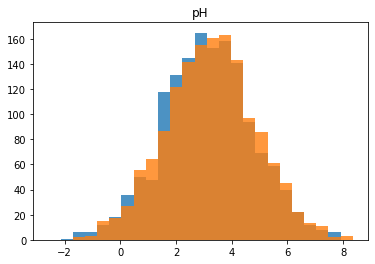

In [15]:
import matplotlib.pyplot as plt
def maak_histogram(dataset,kolomnaam):
        
    red_wines = pd.read_csv('winequality-red.csv',sep=';')
    white_wines = pd.read_csv('winequality-white.csv',sep=';')

    #noise toevoegen
    noise_mean, noise_std = 1, 0.5
    red_wines = red_wines * np.random.normal(noise_mean, noise_std, [len(red_wines),12]) 
    white_wines = white_wines * np.random.normal(noise_mean, noise_std, [len(white_wines),12]) 


    red_wines['type'] = 'red'
    white_wines['type'] = 'white'

    #bepaal de minimum en maximum waardes uit de dataset
    #we gebruiken maar 1500 wijnen per soort om de histogram in balans te houden
    xrange = [dataset[kolomnaam][:1500].min(),dataset[kolomnaam][:1500].max()]

    #plot de histogrammen
    white_wines[kolomnaam][:1500].hist(grid=False, bins=25, range=xrange, alpha = 0.8)
    red_wines[kolomnaam][:1500].hist(  grid=False, bins=25, range=xrange, alpha = 0.8)
    plt.title(kolomnaam)
    plt.show()

maak_histogram(dataset,'pH')

## Maak minstens drie histogrammen van de data in andere kolommen.

Je kunt de exacte kolom namen vinden in de `.columns` eigenschap van een (pandas) dataset `dataset.columns`. Maak minstens drie histogrammen van verschillende kolommen


In [ ]:
#Jouw code hier:
#...

In [ ]:
#Jouw code hier:
#...

Train en test een netwerk op deze data.

Vergeet de normalisatie en train/test split niet.
Je kunt natuurlijk gebruik maken van de functies `bereken_MAE(pred_labels,true_labels)` en/of `bereken_accuracy(pred_labels,true_labels)` 
Gebruik een test_size van `0.5`.





In [ ]:
def prepare_dataset(dataset):
    ...

    #normalisatie
    ...

    #train test split
    ...
    ...
    ...

input_data_train, input_data_test, labels_train, labels_test = prepare_dataset(dataset)

In [ ]:

def train_and_evaluate(input_data_train, input_data_test, labels_train, labels_test)
    ...
    ...
    ...


    ...
    ...
    acc = bereken_accuracy(pred_labels,true_labels)
    print('accuracy: {}'.format(acc))

    return network,acc




network,acc = train_and_evaluate(input_data_train, input_data_test, labels_train, labels_test)


## Wat is een confusion matrix? (zoek op)

## Hoe ziet een confusion matrix eruit wanneer de predicties 100% accuraat zijn?


We gebruiken de `plot_confusion_matrix` functie uit [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) om de confusion matrix te plotten

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(network, input_data_test, labels_test,
                                display_labels=['wit','rood'],
                                cmap=plt.cm.Blues, values_format = '.0f')


## Class imbalance

Neurale netwerken werken het best wanneer de input data 'gebalanceerd' is. Dit betekend dat er per klasse evenveel data beschikbaar is. Bijvoorbeeld 500 witte en 500 rode wijnen. Je gaat nu experimenteren wat er gebeurt als we de data ongebalanceerd aanleveren.

Nu koppelen we de functies die je hierboven hebt gemaakt aan elkaar.

De enige input is nu nog:
 * Het totaal aantal rode wijnen
 * De ratio rode tot witte wijnen (0.8 zou dan betekenen dat 80% van de wijnen rood zijn)

Deze functie maakt dan een dataset aan zoals hierboven, daarna wordt het genormaliseerd, gesplitst, getrained en geëvalueerd eveneens zoals je hierboven hebt gedaan.
Ook wordt de accuracy en confusion matrix geplot

In [ ]:
def test_config(total_wines,red_white_ratio): 
    dataset = create_dataset(total_wines, red_white_ratio)    

    input_data_train, input_data_test, labels_train, labels_test = prepare_dataset(dataset)

    network,acc = train_and_evaluate(input_data_train, input_data_test, labels_train, labels_test)

    print(acc)
    conf_matrix = plot_confusion_matrix(network, input_data_test, labels_test,
                                    display_labels=['wit','rood'],
                                    cmap=plt.cm.Blues, values_format = '.0f')
    return acc,conf_matrix


acc, conf_matrix = test_config(  total_wines = 1000,
                                 red_white_ratio = 0.5)   

Probeer nu minimaal de volgende configuraties uit:







<tr> <th scope="col">total_wines</th> <th scope="col">red_white_ratio</th><th scope="col">accuracy</th><th scope="col">Wat zie je in de confusion matrix?</th></tr>
<tr> <td>2000</td> <td> 0.5 </td><td> ... </td><td> ... </td></tr>
<tr> <td>1000</td> <td> 0.5 </td><td> ... </td><td> ... </td></tr>
<tr> <td> 100 </td> <td> 0.5 </td><td> ... </td><td> ... </td></tr>
<tr> <td> 50 </td> <td> 0.5 </td><td> ... </td><td> ... </td></tr>
<tr> <td>1000</td> <td> 0.25 </td><td> ... </td><td> ... </td></tr>
<tr> <td> 100 </td> <td> 0.25 </td><td> ... </td><td> ... </td></tr>
<tr> <td>1000</td> <td> 0.1 </td><td> ... </td><td> ... </td></tr>
<tr> <td> 100 </td> <td> 0.1 </td><td> ... </td><td> ... </td></tr>
<tr> <td> ... </td> <td> ... </td><td> ... </td><td> ... </td></tr>
<tr> <td> ... </td> <td> ... </td><td> ... </td><td> ... </td></tr>


In [ ]:

acc, conf_matrix = test_config(  total_wines = 1000,
                                 red_white_ratio = 0.25)   

## Werkt het netwerk goed in de gevallen `red_white_ratio = 0.1`?



---



# Korte pauze

In [ ]:
from IPython.display import HTML

def youtube_video(code):
    return HTML(f"<iframe width='1280' height='720'  src='https://www.youtube.com/embed/{code}' frameborder='0' allowfullscreen></iframe>")


In [ ]:
youtube_video('GdTBqBnqhaQ')

In [ ]:
youtube_video('YRhxdVk_sIs')



---



# Mnist Digits

Mnist is een dataset van afbeeldingen van 28x28 pixels zwart en wit. De afbeeldingen bevatten handgeschreven cijfers van 0 tot 9. Het doel is om deze afbeeldingen te analyseren en te predicten welk cijfer er staat.

Data preprocessing


In [ ]:

from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
train_data = train_data.reshape((60000,784))
test_data = test_data.reshape((10000,784))

De data is al gesplitst in een train en test set. We bekijken een aantal afbeeldingen uit de dataset:

In [ ]:
def show_digit(idx,network = None):
    print(train_data[idx].shape)
    img = train_data[idx].reshape((28,28))
    lbl = train_labels[idx]


    plt.imshow(img,cmap='gray')
    if network != None:
        pred = network.predict(img.reshape(1,784))[0]
        plt.title('label: {}, Prediction: {}'.format(lbl,pred))
    else:
        plt.title('label: {}'.format(lbl))
    plt.show()

for i in range(3):
    show_digit(i)


## Is de data genormaliseerd? Hoe kun je dat controleren?

## Controleer of de data genormaliseerd is.


In [ ]:
#Jouw code hier:
#...

## Normaliseer de data als dat nodig is.



In [ ]:

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
train_data = train_data.reshape((60000,784))
test_data = test_data.reshape((10000,784))
#normaliseer hier:


## Train en test een netwerk op de 10000 digits

Omdat dit veel digits zijn, zal je ongeveer 30 seconden moeten wachten.
In de praktijk is het niet gek wanneer het netwerk 24 uur moet trainen. Voor sommig onderzoek (met name [natural language processing](https://en.wikipedia.org/wiki/Natural_language_processing) ) kan het nog verder oplopen. Een extreem geval is [GPT-3](https://lambdalabs.com/blog/demystifying-gpt-3/) wat 355 GPU jaar heeft getrained. Dat wil zeggen dat het aantal GPU keer de hoeveelheid trainingtijd gelijk is aan 355 jaar. Dit heeft (naar schatting) bijna 5 miljoen euro aan stroom gekost!  Het trainen van neurale netwerken wordt gebruikelijk op GPUs (videokaarten) uitgevoerd, dat komt omdat deze goed zijn in matrix rekenen. Normaal gebruiken 3d videogames deze functionaliteit veel voor rendering en [ray-tracing](https://en.wikipedia.org/wiki/Ray_tracing_(graphics)). Tegenwoordig zijn er ook hardware kaarten die speciaal ontworpen zijn voor neurale netwerken.

In [ ]:
from sklearn.neural_network import MLPClassifier

#Jouw code hier:
#...

print('Accuracy: {}'.format(acc))


In [ ]:

for i in range(5):
    show_digit(i,network)

## Hoe groot is het verschil in accuracy als je wel normaliseert t.o.v. je niet normaliseert?

Met de volgende code kun je een beter inzicht krijgen in welke fouten je netwerk maakt. 

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
disp = plot_confusion_matrix(   network, test_data, test_labels,
                                cmap=plt.cm.Blues,
                                values_format = 'g')



## Welke digits haalt het netwerk het meesst door elkaar?


## Leg uit waarom het netwerk juist met die twee digits moeite heeft.

# Overfitten

We gaan nu kijken of we overfitten kunnen herkennen

In [ ]:
hidden_layer_sizes = [20,20,5]
network = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                       max_iter=1,  #run maar 1 epoch per keer dat we network.fit aanroepen
                       warm_start=True #ga verder met de gewichten van het netwerk uit de vorige network.fit (Als dit False was, werden de gewichten elke epoch weggegooit)
                       )


train_accs = []
test_accs = []



num_data = 1000
epochs = 250

for epoch_num in range(epochs):
    network.fit(train_data[:num_data], train_labels[:num_data])
    
    #Bereken de MAE over de training data
    pred_labels = network.predict(train_data[:num_data])
    true_labels = train_labels[:num_data]
    train_acc = bereken_accuracy(pred_labels,true_labels)
    train_accs.append(train_acc)

    #Bereken de MAE over de test data
    pred_labels = network.predict(test_data[:1000])
    true_labels = test_labels[:1000]
    test_acc = bereken_accuracy(pred_labels,true_labels)
    test_accs.append(test_acc)


#plot een aantal predictions en de MAE over de epochs 

plt.plot(train_accs,label='Train acc')
plt.plot(test_accs,label='Test acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.legend()
plt.show()


Experimenteer met de hoeveelheid trainingsdata door `
num_data = ... ` te veranderen, noteer of je overfitting herkent of niet.



<tr> <th scope="col">#trainingsdata</th> <th scope="col">overfitting? Zo ja, vanaf welke epoch?</th></tr>
<tr> <td>2000</td> <td> ... </td> </tr>
<tr> <td>1000</td> <td> ... </td> </tr>
<tr> <td>100</td> <td> ... </td> </tr>
<tr> <td>50</td> <td> ... </td> </tr>
<tr> <td> ... </td> <td> ... </td> </tr>
<tr> <td> ... </td> <td> ... </td> </tr>
<tr> <td> ... </td> <td> ... </td> </tr>



Nu gaan we kijken hoe de accuracy verandert naarmate we meer/minder trainingdata gebruiken. (Je kan de convergence warnings negeren)

In [ ]:



train_accs = []
test_accs = []


nums_data= [50,100,200,300,400,500,600,700,800,900,1000,1250,1500,1750,2000]
for num_data in nums_data:
    hidden_layer_sizes = [20,20,5]
    epochs = 100

    network = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                        max_iter=epochs,  #run maar 1 epoch per keer dat we network.fit aanroepen
                        warm_start=True #ga verder met de gewichten van het netwerk uit de vorige network.fit (Als dit False was, werden de gewichten elke epoch weggegooit)
                        )


    network.fit(train_data[:num_data], train_labels[:num_data])
        
    #Bereken de MAE over de training data
    pred_labels = network.predict(train_data[:num_data])
    true_labels = train_labels[:num_data]
    train_acc = bereken_accuracy(pred_labels,true_labels)

    #Bereken de MAE over de test data
    pred_labels = network.predict(test_data[:1000])
    true_labels = test_labels[:1000]
    test_acc = bereken_accuracy(pred_labels,true_labels)

    train_accs.append(train_acc)
    test_accs.append(test_acc)

#plot een aantal predictions en de MAE over de epochs 
print(test_accs)
plt.scatter(nums_data,train_accs,label='Train acc')
plt.scatter(nums_data,test_accs,label='Test acc')
plt.xlabel('#trianingdata')
plt.ylabel('Accuracy')
#plt.ylim(0,1)
plt.legend()
plt.show()


Je ziet hierboven hoe de test accuracy verbetert naarmate je meer training data toevoegd

## Gegeven de netwerk architectuur en de op te lossen taak: Hoeveel trainingsdata is genoeg? 



---



Als je wilt, kun je in Paint, Photoshop etc. zelf een cijfer maken.

*   Open een afbeelding met zwarte achtergrond van 28x28 pixels. ![gebruik bijvoorbeeld deze afbeelding](https://puc.science.ru.nl/seminar_neurale_netwerken/week2/black.png)
*   Teken in het wit een digit. ![5](https://puc.science.ru.nl/seminar_neurale_netwerken/week2/5.png) ![6](https://puc.science.ru.nl/seminar_neurale_netwerken/week2/6.png) ![7](https://puc.science.ru.nl/seminar_neurale_netwerken/week2/7.png)
*   Sla het bestand op als .png
*   upload de afbeelding hieronder






In [ ]:
from google.colab import files
name = files.upload()
name = list(name.keys())[0]

In [ ]:
import imageio
import numpy as np
im = imageio.imread(name)[:,:,0] #Get one (colour) channel from the image
im  = (im  - im.mean())  / (im.max() - im.min() ) #normalise
plt.imshow(im,cmap='gray') # show image
plt.show()


In [ ]:
pred = network.predict(im.reshape(1,784))[0]
proba = network.predict_proba(im.reshape(1,784)).reshape((10,))

plt.bar(np.arange(10), height= proba)
plt.xticks(np.arange(10))
plt.show()
print('The network predicted: {} with a confidence of {:.0f}%'.format(pred,proba[pred]*100))

## Werkt het netwerk goed op jouw digits?

Als het niet goed werkt kun je twee dingen doen.

1.   Het netwerk op meer data laten trainen
2.   Probeer de brush-size van je pen/kwast in paint aan te passen zodat het vergelijkbaar is met de afbeeldingen in de dataset



# Convolutional neural networks

Een standaard neuraal netwerk is in principe niet geschikt voor afbeeldingen. Het gebruikt namelijk geen 'spatial relationships' (ruimtelijke relaties) uit de afbeelding. Twee pixel die naast elkaar staan, hebben geen speciale betekenis in het netwerk ten op zichte van twee pixels die ver van elkaar staan.

Als je aan het begin van deze opdracht kijkt, zie je data we de data hebben gereshaped naar (60000,784) Dit betekent dat we 60000 objecten hebben van 784 waardes lang (784 = 28x28 pixels in de afbeelding). De informatie over de `x` en `y` positie van elke pixelwaarde en wat de waardes van de aangrenzende pixels worden niet meegenomen in deze data. Dit is een beperking van een standaard neural netwerk.




Er is ook een type netwerk wat dit wel heeft namelijk een Convolutional Neural Network(CNN). Dit type netwerk zit niet ingebouwd in de library sklearn dat we tot nu toe hebben gebruikt. We kunnen het wel vinden in de profesionelere libraries. In die libraries is veel meer mogelijk met neurale netwerken. Het werken met deze libraries een stuk complexer. Voorbeelden van zulke libraries zijn Tensorflow/Keras of pytorch.


In [deze](https://medium.com/analytics-vidhya/cnn-convolutional-neural-network-8d0a292b4498) [links](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148) kun je meer te weten komen over CNN's. Standaard neurale netwerken worden ook wel MultiLayer Perceptrons (MLP) genoemd.

## Waardoor komt het dat een CNN gebruik kan maken van spatial relationships?

## Wat is een convolutie?

## Wat is een kernel?

## Wat is een fully-connected layer

Wij maken voor jou een CNN aan in tensorflow, waarmee je aan de slag kan.

Eerst laden we de data weer in zoals hiervoor.

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

Hieronder maken we een CNN aan. We moeten elke laag individueel aangeven. Nu hebben we ook verschillende type lagen. Een convolutie laag 'Conv2d', een laag die de afbeelding halveert 'MaxPool2D', een laag die de afbeelding omzet naar een lijst 'Flatten' en de laag die we kennen uit sklearn 'Dense' (de fully-conected laag)

Als een afbeelding door het netwerk heen gaat, wordt die steeds iets kleiner. Hoe groot de afbeelding op elke laag is, staat in commentaar naast elke laag.

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
#create model
def create_model():
    model = tf.keras.models.Sequential()#add model layers
    model.add(Conv2D(8, kernel_size=3, activation='relu' , input_shape=(28,28,1))) #28x28 -> 27x27
    model.add(Conv2D(16, kernel_size=3, activation='relu')) #27x27 -> 26x26
    model.add(MaxPool2D()) # 26x26 -> 13x13
    model.add(Conv2D(32, kernel_size = 3, activation='relu'))  #13x13->12x12
    model.add(MaxPool2D()) # 12x12 -> 6x6 
    model.add(Flatten()) # 6x6 -> 36
    model.add(Dense(10, activation='softmax' )) # 36 -> 10

    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
    model.compile(optimizer='adam',
                loss=loss_fn,
                metrics=['accuracy'])

    return model

We maken hierboven ook een cost functie aan. (dit wordt ook wel een error of loss function genoemd) Cross entropy is de loss function die je bij een softmax activatie (dus classificatie) gebruikt.

Ook maken we een optimizer aan. Deze gebruik de afgeleides die we hebben berekend om de gewichten aan te passen.

In [ ]:

num_data = 2000
model = create_model()
model.fit(x_train[:num_data], y_train[:num_data], epochs=5)


In [ ]:
model.evaluate(x_test,  y_test)

We hebben nu voor 5 epochs getrained op een trainingsset van 2000 voorbeelden.
## Welke performance zou het netwerk wat we in sklearn gemaakt hebben hiermee behalen?



---



---



Dit is het einde van de opdrachten van week 2. Nu weer een paar leuke videos voor als je tijd over hebt :) Deze videos gaan allemaal over reinforcement learning, waar een 'agent' in een 'environment' een bepaalde taak probeerd te optimaliseren.

In [ ]:
from IPython.display import HTML

def youtube_video(code):
    return HTML(f"<iframe width='1280' height='720'  src='https://www.youtube.com/embed/{code}' frameborder='0' allowfullscreen></iframe>")


In [ ]:
youtube_video('Lu56xVlZ40M')

In [ ]:
youtube_video('tfb6aEUMC04')

In [ ]:
youtube_video('Tnu4O_xEmVk')

Als je zelf iets wil doen met een zelfrijdende auto, dan is het misschien interessant om [dit](https://github.com/Niels-van-den-Hork/Self-driving-Car-Neural-Network) als basis te nemen. Hierin rij je zelf eerst een stukje om trainingsdata te genereren, daarna kan het netwerk jouw rijgedrag leren, en zelf beter rijden dan jij. (trainingsdata is al bijgevoegd)